In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

G:\Learning resource\Github\WineQuality\SMSmall\Data Loader\Datdo_DataExplore\WineQuality
G:\Learning resource\Github\WineQuality\SMSmall\Data Loader\Datdo_DataExplore\WineQuality\Data set


In [5]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")
df_white_wine = load_wine_data(WINE_DIR, "winequality-white.csv", ";")

# Overall Analysis: 2 Dataframe df_red_wine & df_white_wine

## 1. Showing, check the min, max, avg of the whole dataset

In [96]:
#Dat

df_red_wine.head()
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Dat

df_red_wine_des = df_red_wine.describe()
df_red_wine_des
df_white_wine_des = df_red_wine.describe()
df_white_wine_des

In [ ]:
#Dat

df_red_wine_minmax = df_red_wine_des.loc[["mean", "max", "min"]]
print(df_red_wine_minmax)
df_white_wine_minmax = df_red_wine_des.loc[["mean", "max", "min"]]
print(df_white_wine_minmax

## 2. check missing data point, plot a heat map of showing if null is exist

In [36]:
#Dat

print("Total missing values of red wine: ",df_red_wine.isnull().sum().sum())
print("Total missing values of white wine: ",df_red_wine.isnull().sum().sum())

Total missing values of red wine:  0
Total missing values of white wine:  0


## 3. Show number of samples and features using df.info() && 4. Check the info, datatype of each feature

In [ ]:
#Dat

df_red_wine.info()
df_white_wine.info()

## 5. Correlation and Covariance

# Deep Analysis

## Create scatter plots between every 2 pairs of features: 

## Create histogram subplots to visualize all features

In [ ]:
#Dat
# Red_wine histogram

fig, axs = plt.subplots(6, 2, figsize=(15,30))
ndarray_red_features = df_red_wine.columns.values.reshape(6,2)
for i in range(6):
    for j in range(2):
        feature = ndarray_red_features[i, j]
        df_red_wine[feature].plot(kind="hist", bins=30, ax=axs[i, j])
        axs[i,j].set(title = feature, ylabel="Count")

In [ ]:
#Dat
# White_wine histogram

fig, axs = plt.subplots(6, 2, figsize=(15,30))
ndarray_white_features = df_white_wine.columns.values.reshape(6,2)
for i in range(6):
    for j in range(2):
        feature = ndarray_white_features[i, j]
        df_white_wine[feature].plot(kind="hist", bins=30, ax=axs[i, j])
        axs[i,j].set(title = feature, ylabel="Count")

## Create visualization plots for every feature

In [ ]:
#Dat

fig, axs = plt.subplots(1, 2, figsize=(15,15))

# Red_wine quality pie chart

red_wine_quality = df_red_wine['quality'].value_counts()
plt.subplot(1,2,1)
plt.pie(red_wine_quality, startangle=90, labels=red_wine_quality.index)
plt.title("Red wine quality")

# White_wine quality pie chart

white_wine_quality = df_white_wine['quality'].value_counts()
plt.subplot(1,2,2)
plt.pie(white_wine_quality, startangle=90, labels=white_wine_quality.index)
plt.title("White wine quality")

<AxesSubplot:ylabel='quality'>

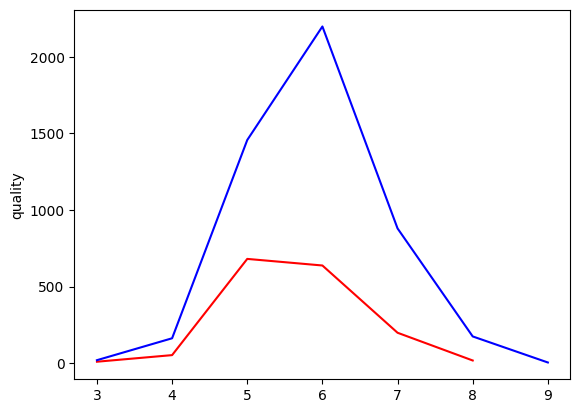

In [100]:
#Dat

sns.lineplot(data = red_wine_quality, color='r')
sns.lineplot(data = white_wine_quality, color='b')

# Draft

> hl271

## 3. Suggest ML Algorithm to classify the wine's quality

### Approach 1: Convert to Regression Problem: 

- Suggested Model
    - Multiple Linear Regression Model
- Feature Selection: Choose 4-5 most correlated features to wine's quality (Ex: alcohol, acid_citric, sulphate, volatile acidity) 
- Round up the predicted quality to integer value

### Approach 2: Classification Problem

- For simplifying purpose, we can use **binary classification**: classify wine's quality is 
    - bad if quality <=5
    - good if quality >5
- Suggested Models:
    - Support Vector Classifier
    - Decision Tree/ Random Forest Classifier

> hl271

## 4. Suggest ML Algorithm to group wine based on its features
- This is a **Clustering** problem
- Suggested Model:
    - K-Means